In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (mac용)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'Nanumgothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지 (나눔고딕)
import matplotlib
matplotlib.rc('font', family='NanumGothic')  # 여기 수정
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('df_clean.csv', parse_dates=['OrderDT', 'DeliveryDT'])

# 확인
print("✅ 데이터 shape:", df.shape)
print("✅ 컬럼 목록:\n", df.columns)
df.head()


✅ 데이터 shape: (856727, 32)
✅ 컬럼 목록:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1


# 월 단위 추출
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # Period 타입

# 월별 매출 합계
monthly_sales = df.groupby('OrderMonth')['Price'].sum()

# 시각화
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.title('📈 월별 매출 추이')
plt.xlabel('주문월')
plt.ylabel('매출 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 시간대별 매출패턴

## 요일별 매출 비교 (2030 vs 4060)

In [3]:
df_unique = df.drop_duplicates(subset=['idUser', 'OrderDT'])

print(df_unique)

#df = df_unique

        idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0       U10001     여성   26      20대            2        Y  U10001-O2022-1002   
4       U10001     여성   26      20대            2        Y  U10001-O2022-1003   
8       U10001     여성   26      20대            2        Y  U10001-O2022-1004   
12      U10001     여성   26      20대            2        Y  U10001-O2022-1005   
19      U10001     여성   26      20대            2        Y  U10001-O2022-1006   
...        ...    ...  ...      ...          ...      ...                ...   
856697  U13000     여성   30      30대            1        N  U13000-O2024-1013   
856701  U13000     여성   30      30대            1        N  U13000-O2024-1007   
856710  U13000     여성   30      30대            1        N  U13000-O2024-1014   
856714  U13000     여성   30      30대            1        N  U13000-O2024-1015   
856720  U13000     여성   30      30대            1        N  U13000-O2024-1008   

                   OrderDT  OrderMonth 

In [4]:
from datetime import datetime, timedelta

df["OrderDT_date"] = pd.to_datetime(df["OrderDT"])

def dateweek(x):

    return x.strftime("%Y:%m:%d:%H:%M:%S")

df["OrderDT_Formatted"] = df["OrderDT_date"].apply(dateweek)

print(df["OrderDT_Formatted"])

print(df["DeliveryDT"])

df["DeliveryDT_date"] = pd.to_datetime(df["DeliveryDT"])

df["DeliveryDT_Formatted"] = df["DeliveryDT_date"].apply(dateweek)

print(df["DeliveryDT_Formatted"])

print(df["OrderDT_Formatted"][2])

t1 = datetime.strptime(df["OrderDT_Formatted"][2], "%Y:%m:%d:%H:%M:%S")
t2 = datetime.strptime(df["DeliveryDT_Formatted"][2], "%Y:%m:%d:%H:%M:%S")

#print(t1, t2)
#print(t1[1], t1[3], t1[5])

# 시간 차이 계산
delta = t2 - t1
seconds = delta.total_seconds()

print(delta)

0         2022:01:06:17:08:00
1         2022:01:06:17:08:00
2         2022:01:06:17:08:00
3         2022:01:06:17:08:00
4         2022:01:13:16:50:00
                 ...         
856722    2024:12:26:14:06:00
856723    2024:12:26:14:06:00
856724    2024:12:26:14:06:00
856725    2024:12:26:14:06:00
856726    2024:12:26:14:06:00
Name: OrderDT_Formatted, Length: 856727, dtype: object
0        2022-01-07 06:24:00
1        2022-01-07 06:24:00
2        2022-01-07 06:24:00
3        2022-01-07 06:24:00
4        2022-01-14 06:28:00
                 ...        
856722   2024-12-27 04:23:00
856723   2024-12-27 04:23:00
856724   2024-12-27 04:23:00
856725   2024-12-27 04:23:00
856726   2024-12-27 04:23:00
Name: DeliveryDT, Length: 856727, dtype: datetime64[ns]
0         2022:01:07:06:24:00
1         2022:01:07:06:24:00
2         2022:01:07:06:24:00
3         2022:01:07:06:24:00
4         2022:01:14:06:28:00
                 ...         
856722    2024:12:27:04:23:00
856723    2024:12:27:04:23:00


In [5]:
def check_delivery(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1

# 적용
df_unique["OnTime"] = df_unique.apply(lambda df_unique: check_delivery(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

print(df_unique["OnTime"].value_counts())

0    160881
1     10798
Name: OnTime, dtype: int64


In [6]:
def check_delivery2(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour
    # 당일 밤 9시 이후인데
    if order_hour >= 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

# 적용
df_unique["OnTime2"] = df_unique.apply(lambda df_unique: check_delivery2(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

print(df_unique["OnTime2"].value_counts())

1.0    26088
0.0      292
Name: OnTime2, dtype: int64


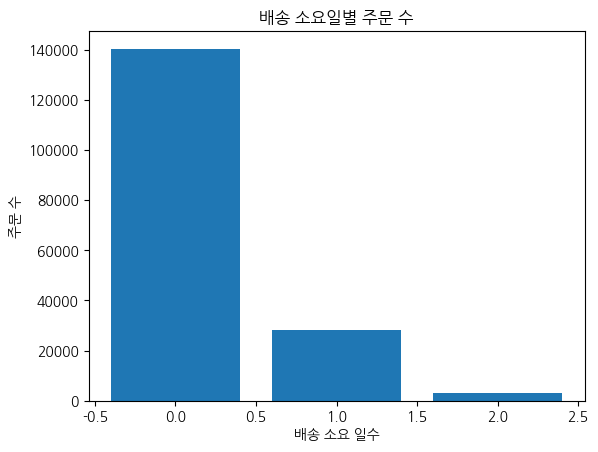

In [7]:
# 날짜형으로 변환 (필요 시)
df_unique["OrderDT"] = pd.to_datetime(df_unique["OrderDT"])
df_unique["DeliveryDT"] = pd.to_datetime(df_unique["DeliveryDT"])

# 날짜 차이 계산
df_unique["OnTime3"] = (df_unique["DeliveryDT"] - df_unique["OrderDT"]).dt.days

# 결과 시각화
cc = df_unique["OnTime3"].value_counts().sort_index()
plt.bar(x=cc.index, height=cc.values)
plt.xlabel("배송 소요 일수")
plt.ylabel("주문 수")
plt.title("배송 소요일별 주문 수")
plt.show()


In [8]:
# 날짜형으로 변환 (필요 시)
df_unique["OrderDT"] = pd.to_datetime(df_unique["OrderDT"])
df_unique["DeliveryDT"] = pd.to_datetime(df_unique["DeliveryDT"])

# 날짜 차이 계산
df_unique["OnTime3"] = (df_unique["DeliveryDT"] - df_unique["OrderDT"]).dt.days

# 소요 일수별 주문 수 계산
cc = df_unique["OnTime3"].value_counts().sort_index()

# 표로 보기 좋게 변환
cc_df = cc.reset_index().rename(columns={"index": "배송 소요 일수", "OnTime3": "주문 수"})
print(cc_df)
cc_df

   배송 소요 일수    주문 수
0         0  140432
1         1   28309
2         2    2938


,배송 소요 일수,주문 수
0,0,140432
1,1,28309
2,2,2938


5     15217
10    14751
3     14713
8     14703
7     14701
1     14538
6     14181
11    14069
12    14016
4     13978
9     13763
2     13049
Name: Month, dtype: int64
📊 월별 배송 지연 여부
OnTime4      0    1
Month              
1        13654  884
2        12188  861
3        13802  911
4        13121  857
5        14308  909
6        13313  868
7        13841  860
8        13757  946
9        12844  919
10       13824  927
11       13177  892
12       13052  964


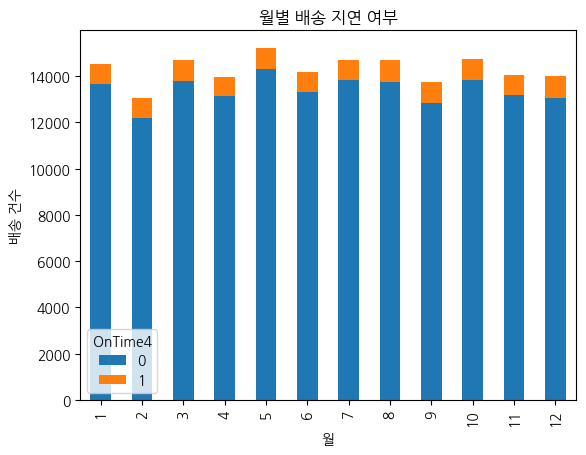

In [9]:
def check_delivery4(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1

# 22+23+24 1월 합산


# 적용
df_unique["OnTime4"] = df_unique.apply(lambda df_unique: check_delivery4(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

df_unique["Month"] = df_unique["OrderDT"].dt.month
print(df_unique["Month"].value_counts())
#monthly_delay = df.groupby("Month")["OnTime4"].value_counts().unstack(fill_value=0)
#df["Month_date"] = df.groupby("Month")["OnTime4"].value_counts()

#print(monthly_delay.value_counts())

monthly_delay = df_unique.groupby("Month")["OnTime4"].value_counts().unstack(fill_value=0)

# 결과 확인
print("📊 월별 배송 지연 여부")
print(monthly_delay)

# 그래프 그리기
monthly_delay.plot(kind="bar", stacked=True, title="월별 배송 지연 여부")
plt.xlabel("월")
plt.ylabel("배송 건수")
plt.show()


2024    62550
2023    57491
2022    51638
Name: Year, dtype: int64
📊 매년 배송 지연 여부
OnTime5      0     1
Year                
2022     48711  2927
2023     53635  3856
2024     58535  4015


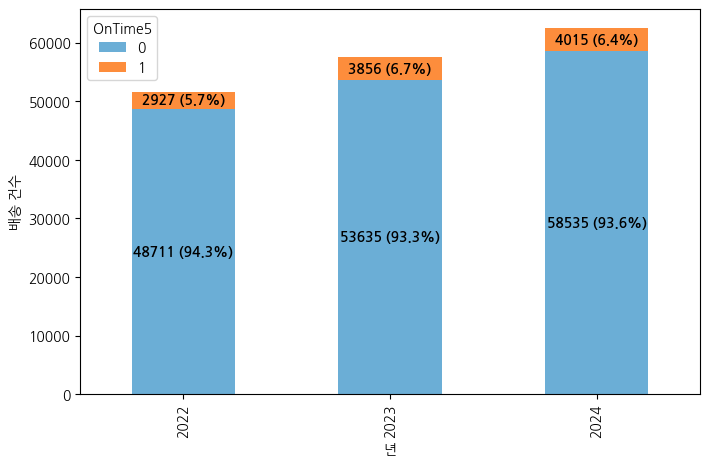

In [10]:
def check_delivery5(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1


# 적용
df_unique["OnTime5"] = df_unique.apply(lambda df_unique: check_delivery5(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

df_unique["Year"] = df_unique["OrderDT"].dt.year
print(df_unique["Year"].value_counts())

year_delay = df_unique.groupby("Year")["OnTime5"].value_counts().unstack(fill_value=0)

# 결과 확인
print("📊 매년 배송 지연 여부")
print(year_delay)

yearly_delay_ratio = year_delay.div(year_delay.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(8, 5))
year_delay.plot(kind="bar", stacked=True, ax=ax, color=["#6baed6", "#fd8d3c"])

# 숫자와 비율 표시
for i, (index, row) in enumerate(year_delay.iterrows()):
    total = row.sum()
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax.text(i, row[:j+1].sum() - value/2, f"{value} ({percentage:.1f}%)",
                ha="center", va="center", color="black", fontsize=10, fontweight="bold")

# 그래프 그리기
#year_delay.plot(kind="bar", stacked=True, title="매년 배송 지연 여부")
plt.xlabel("년")
plt.ylabel("배송 건수")
plt.show()


In [11]:
import pandas as pd

# 열 최대 개수 무제한으로 설정
pd.set_option('display.max_columns', None)

# (선택) 너비도 넉넉하게 설정해서 잘림 방지
pd.set_option('display.width', None)

# (선택) 한 줄에 너무 많은 데이터가 붙지 않게 colwidth도 설정 가능
pd.set_option('display.max_colwidth', None)  # 또는 pd.set_option('display.max_colwidth', -1) (버전별 차이 있음)


In [12]:
df_unique.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OnTime', 'OnTime2', 'OnTime3',
       'OnTime4', 'Month', 'OnTime5', 'Year'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

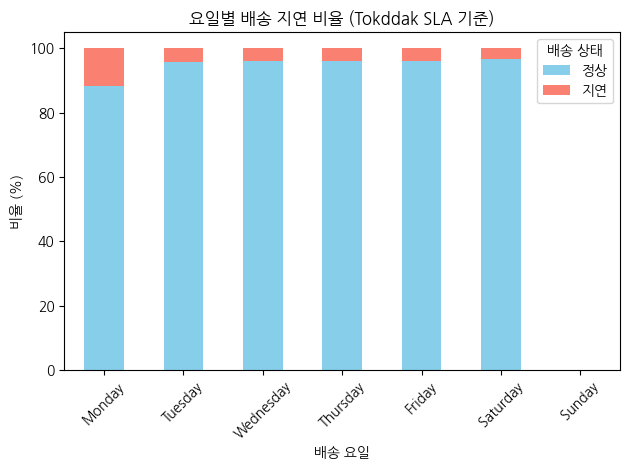

In [35]:
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd

# 1. 수정된 SLA 기반 배송 지연 판단 함수
def check_delivery(order, delivery):
    order_hour = order.hour
    order_weekday = order.weekday()  # 월=0, ..., 일=6

    # 일요일 21시 이후 주문 → 화요일 7시까지 정상
    if order_weekday == 6 and order_hour >= 21:
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    # 토요일 또는 일요일 21시 이전 주문 → 월요일 7시까지 정상
    elif (order_weekday == 5) or (order_weekday == 6 and order_hour < 21):
        if order_weekday == 5:  # 토요일
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        else:  # 일요일 21시 이전
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)

    # 평일 주문 처리
    else:
        if order_hour < 21:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        else:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    return 0 if delivery <= deadline else 1


# 2. 주문 기준 중복 제거
df_unique = df.drop_duplicates(subset="idOrder").copy()

# 3. 요일 및 배송 상태 계산
df_unique["OrderWeekday"] = df_unique["OrderDT"].dt.day_name()
df_unique["DeliveryWeekday"] = df_unique["DeliveryDT"].dt.day_name()
df_unique["OnTime"] = df_unique.apply(lambda row: check_delivery(row["OrderDT"], row["DeliveryDT"]), axis=1)
df_unique["OnTimeYN"] = df_unique["OnTime"].apply(lambda x: "정상" if x == 0 else "지연")

# 4. 요일별 배송 지연 비율 계산 (도착 기준)
delay_by_day = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts(normalize=True).unstack().fillna(0) * 100
delay_by_day = delay_by_day[["정상", "지연"]]  # 순서 고정
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
delay_by_day = delay_by_day.reindex(order)

# 5. 시각화
plt.figure(figsize=(10, 6))
delay_by_day.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

plt.title("요일별 배송 지연 비율 (Tokddak SLA 기준)")
plt.xlabel("배송 요일")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [36]:
total_delay_rate = (df_unique["OnTimeYN"] == "지연").mean() * 100
print(f"전체 배송 지연율: {total_delay_rate:.2f}%")


전체 배송 지연율: 5.52%


In [37]:
delay_by_day

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,88.282120,11.717880
Tuesday,95.867270,4.132730
Wednesday,96.202776,3.797224
Thursday,95.953776,4.046224
Friday,96.045050,3.954950
Saturday,96.643016,3.356984
Sunday,NaN,NaN


In [38]:
# 요일 추출
df["DeliveryWeekday"] = df["OrderDT"].dt.day_name()

# 요일별 배송 횟수 계산
delivery_counts = df["DeliveryWeekday"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).fillna(0).astype(int)

# 표 형태로 출력
delivery_df = delivery_counts.reset_index()
delivery_df.columns = ["요일", "배송 횟수"]
print(delivery_df)


          요일   배송 횟수
0     Monday  120151
1    Tuesday  133655
2  Wednesday  155182
3   Thursday  149173
4     Friday  105256
5   Saturday    8045
6     Sunday  185265


In [39]:
delay_count_by_day = df_unique[df_unique["OnTimeYN"] == "지연"]["DeliveryWeekday"].value_counts().reindex(order, fill_value=0)
print(delay_count_by_day)


Monday       4210
Tuesday      1096
Wednesday     982
Thursday     1215
Friday       1208
Saturday      757
Sunday          0
Name: DeliveryWeekday, dtype: int64


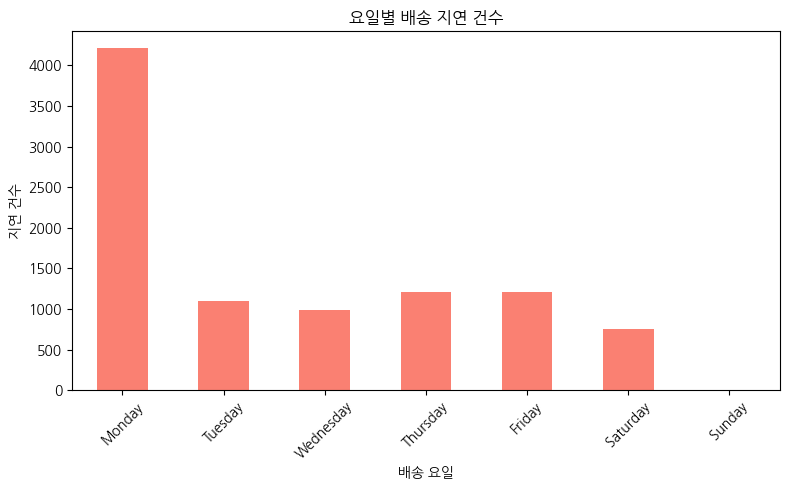

In [40]:
plt.figure(figsize=(8, 5))
delay_count_by_day.plot(kind="bar", color="salmon")
plt.title("요일별 배송 지연 건수")
plt.xlabel("배송 요일")
plt.ylabel("지연 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


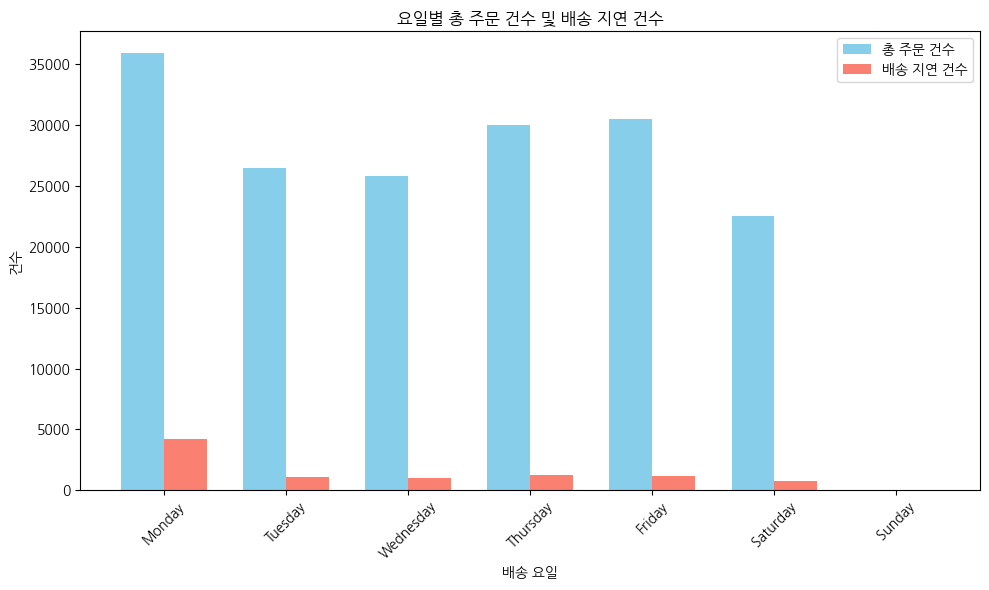

In [41]:
import numpy as np

# 요일 기준 정렬용 리스트
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# 요일별 총 주문 건수 (도착 기준)
total_by_day = df_unique["DeliveryWeekday"].value_counts().reindex(order, fill_value=0)

# 요일별 배송 지연 건수
delay_by_day = df_unique[df_unique["OnTimeYN"] == "지연"]["DeliveryWeekday"].value_counts().reindex(order, fill_value=0)

# x축 위치 조정
x = np.arange(len(order))
width = 0.35

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, total_by_day, width=width, label='총 주문 건수', color='skyblue')
plt.bar(x + width/2, delay_by_day, width=width, label='배송 지연 건수', color='salmon')

# 라벨 및 꾸미기
plt.title("요일별 총 주문 건수 및 배송 지연 건수")
plt.xlabel("배송 요일")
plt.ylabel("건수")
plt.xticks(x, order, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


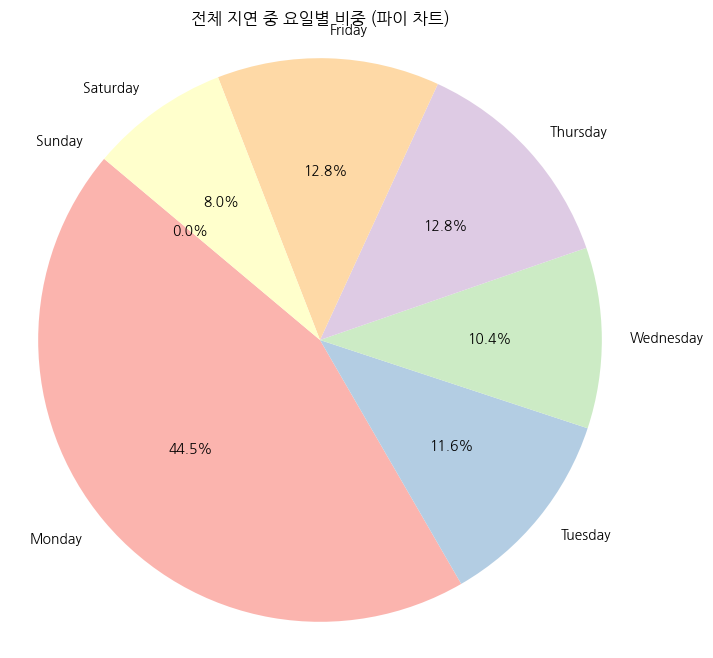

In [42]:
# 전체 지연 중 요일별 비중 (배송 요일 기준)
delay_share_by_day = df_unique[df_unique["OnTimeYN"] == "지연"]["DeliveryWeekday"].value_counts(normalize=True).reindex(order, fill_value=0) * 100

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    delay_share_by_day,
    labels=delay_share_by_day.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("전체 지연 중 요일별 비중 (파이 차트)")
plt.axis("equal")  # 원형 유지
plt.show()


<Figure size 1000x600 with 0 Axes>

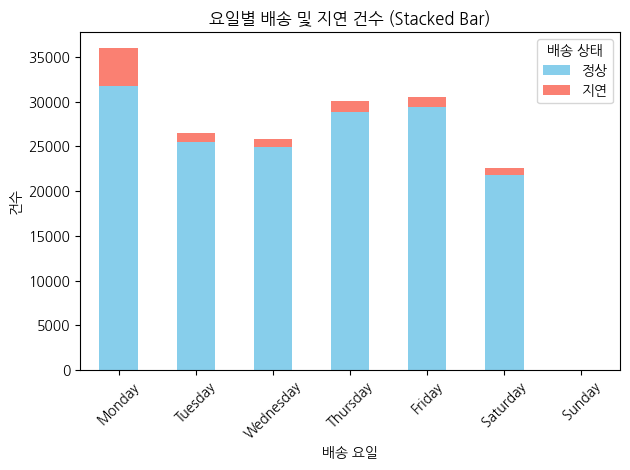

In [47]:
# 요일 기준 정렬용 리스트
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# 요일별 배송 상태별 건수 집계
status_by_day = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts().unstack().fillna(0)
status_by_day = status_by_day.reindex(order)

# 시각화
plt.figure(figsize=(10, 6))
status_by_day.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

# 꾸미기
plt.title("요일별 배송 및 지연 건수 (Stacked Bar)")
plt.xlabel("배송 요일")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [44]:
status_by_day

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,31718.0,4210.0
Tuesday,25424.0,1096.0
Wednesday,24879.0,982.0
Thursday,28813.0,1215.0
Friday,29336.0,1208.0
Saturday,21793.0,757.0
Sunday,NaN,NaN


In [ ]:
df_unique